# 前書き

Pandasにおけるグルーピングと時系列データについて紹介し、

最後に回帰分析によるデータ分析演習を⾏う

# 1. データのグルーピング

本書ではデータをグルーピングしてグループごとに

値を集約、変換、抽出する⽅法を説明する。

## 1-1. DataFrameのグルーピング

DataFrameのカラム中に共通の値を持つ⾏をグループに分けることができる。

グループのイメージを下記の図に⽰す。

年度ごとの商品の⼊荷数と売り上げ個数をまとめたテーブルについて商品ごとにグルーピングしたイメージである。

⼈参とジャガイモの2つのグループがある。

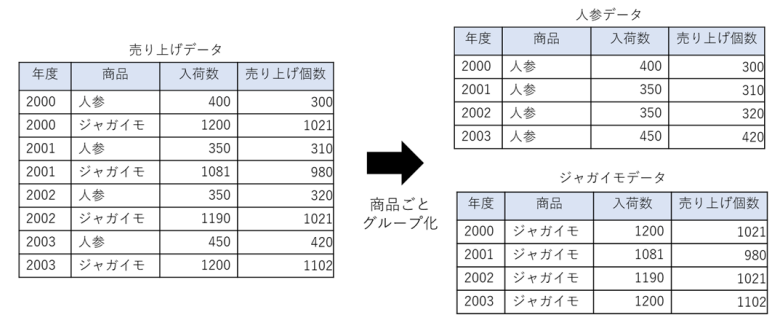

先ほどの図と同様のデータを持つ sales.csv を利⽤してグルーピングの説明をする。

In [ ]:
import pandas as pd

df = pd.read_csv('sales.csv')

print(df)

   year product  arrival  sales
0  2000  carrot      400    300
1  2000  potato     1200   1021
2  2001  carrot      350    310
3  2001  potato     1081    980
4  2002  carrot      350    320
5  2002  potato     1190   1021
6  2003  carrot      450    420
7  2003  potato     1200   1102


### グループピングの⽅法

DataFrameをグルーピングするには DataFrameオブジェクト.groupby メソッドを利⽤する。

下記に利⽤⽅法を⽰す。


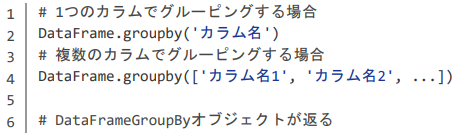

下記に基本的な利⽤例を⽰す。

In [ ]:
import pandas as pd

df = pd.read_csv('sales.csv')

print(df)

# 商品でグルーピングする
groups = df.groupby('product')

# DataFrameGroupByオブジェクトが取得される
print(type(groups))

   year product  arrival  sales
0  2000  carrot      400    300
1  2000  potato     1200   1021
2  2001  carrot      350    310
3  2001  potato     1081    980
4  2002  carrot      350    320
5  2002  potato     1190   1021
6  2003  carrot      450    420
7  2003  potato     1200   1102
<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


グループに対して操作をする場合は、 DataFrameオブジェクト.groupby メソッドで得られた DataFrameGroupByオブジェクト を利⽤する。


## 1-2. DataFrameGroupByの基本操作

DataFrameオブジェクト.groupby メソッドは戻り値として DataFrameGroupByオブジェクト を返すことを紹介した。

グループに対する操作は DataFrameGroupByオブジェクト を通して⾏う。

### イテレータを⽤いたアクセス

DataFrameGroupByオブジェクト はイテレータを持ち、イテレータを通して各グループにアクセスできる。

for文 を利⽤してグループを取得してグループを表⽰し
てみる。

In [ ]:
import pandas as pd

df = pd.read_csv('sales.csv')

# 商品でグルーピングする
groups = df.groupby('product')
print("groups")

for group in groups:
  print(group)

groups
('carrot',    year product  arrival  sales
0  2000  carrot      400    300
2  2001  carrot      350    310
4  2002  carrot      350    320
6  2003  carrot      450    420)
('potato',    year product  arrival  sales
1  2000  potato     1200   1021
3  2001  potato     1081    980
5  2002  potato     1190   1021
7  2003  potato     1200   1102)


実⾏結果を確認すると、 (グルーピングのキー, DataFrameオブジェクト) のタプル形式のオブジェクトが返ってきており、

グループごとに DataFrameオブジェクト が分けられていることが分かる。

次に、これらグループにアクセスして、グループごとの⼊庫数と売り上げ個数の合計を算出する。

 DataFrameGroupByオブジェクト のイテレータから返されるオブジェクトの第1要素が グルーピングのキー 、第2要素がグルーピングされた⾏のみを持つ DataFrameオブジェクト であることを利⽤する。


In [ ]:
import pandas as pd

df = pd.read_csv('sales.csv')

# 商品でグルーピングする
groups = df.groupby('product')

for group in groups:
  # 第1要素はグルーピングのキー
  key = group[0]
  # 第2要素はグルーピングされた行のみを持つ`DataFrameオブジェクト`
  df_group = group[1]
  print('arrival: key={}, sum={}'.format(key, df_group['arrival'].sum()))
  print('sales : key={}, sum={}'.format(key, df_group['sales'].sum()))


arrival: key=carrot, sum=1550
sales : key=carrot, sum=1350
arrival: key=potato, sum=4671
sales : key=potato, sum=4124


このように、 DataFrameGroupByオブジェクト を利⽤することで

グループごとに⼊荷数と売り上げ個数の合計を出せることを確認できた。


## 1-3. DataFrameGroupByのメソッド

DataFrameGroupByオブジェクトの持つメソッドについて紹介する。

先ほどの例では、 for文 を利⽤して各カラムの合計値を表⽰する例を⽰したが、

DataFrameGroupByオブジェクトに⽤意されているメソッドを利⽤すれば、

for文 を利⽤せずともグループのカラムごとに値の集約と変換ができる。

また、特定の条件に合致したグループを抽出することもできる。

### 基本的な集約メソッド

基本的な集約メソッドを利⽤することで、グループのカラムごとに集約値を算出することができる。

下記に代表的な集約メソッドを⽰す。

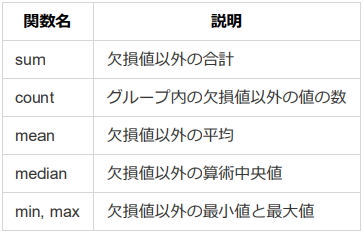

グループごのカラムごとに集約メソッドが適⽤される

イメージを sum メソッドを例に⽰す。

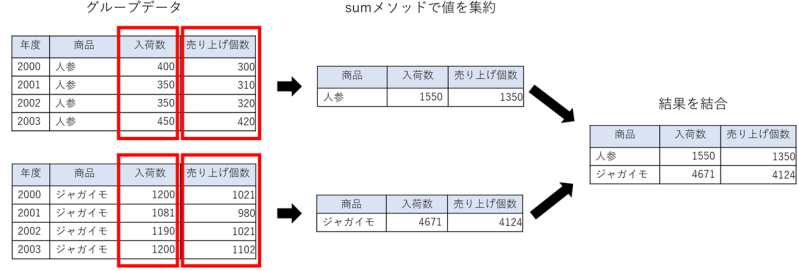

下記に利⽤例を⽰す。

In [ ]:
import pandas as pd

df = pd.read_csv('sales.csv')

groups = df.groupby(['product'])

df_sum = groups.sum()
df_count = groups.count()
df_mean = groups.mean()
df_median = groups.median()
df_min = groups.min()
df_max = groups.max()

print("--sum--\n{}".format(df_sum))
print("\n--count--\n{}".format(df_count))
print("\n--mean--\n{}".format(df_mean))
print("\n--median--\n{}".format(df_median))
print("\n---min--\n{}".format(df_min))
print("\n---max--\n{}".format(df_max))


--sum--
         year  arrival  sales
product                      
carrot   8006     1550   1350
potato   8006     4671   4124

--count--
         year  arrival  sales
product                      
carrot      4        4      4
potato      4        4      4

--mean--
           year  arrival   sales
product                         
carrot   2001.5   387.50   337.5
potato   2001.5  1167.75  1031.0

--median--
           year  arrival   sales
product                         
carrot   2001.5    375.0   315.0
potato   2001.5   1195.0  1021.0

---min--
         year  arrival  sales
product                      
carrot   2000      350    300
potato   2000     1081    980

---max--
         year  arrival  sales
product                      
carrot   2003      450    420
potato   2003     1200   1102


### agg(aggregate)

agg 、 aggregate メソッド利⽤することで、

グループのカラムごとに関数を適⽤して値を集約することができる。

⼀度に複数の基本的な集約メソッドをグループに適⽤したり、

特定のカラムのみ基本的な集約メソッドを適⽤できたりする。

下記に利⽤⽅法を⽰す。

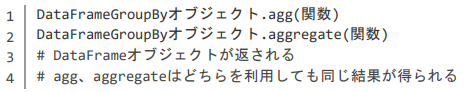

関数には 基本的な集約メソッド で紹介した

メソッド名、組み込み関数、⾃作関数を指定できる。

### 基本的な集約メソッドを適⽤

基本的な集約メソッドで紹介した sum メソッドを適⽤して合計値を求める。

この例は、基本的な集約メソッドの sum メソッドを呼び出したのと同様の操作である。

In [ ]:
import pandas as pd

df = pd.read_csv('sales.csv')

groups = df.groupby(['product'])

df_agg = groups.agg('sum')
print(df_agg)

         year  arrival  sales
product                      
carrot   8006     1550   1350
potato   8006     4671   4124


### 基本的な集約メソッドを複数適⽤

複数のメソッドを同時に適⽤することもできる。

先ほどの sum に加えて min 、 max を適⽤する。

In [ ]:
import pandas as pd

df = pd.read_csv('sales.csv')

groups = df.groupby('product')

df_agg = groups.agg(['sum', 'min', 'max'])
print(df_agg)

# カラムごとの集約値は下記のように取得できる
print('\n--sales sum--')
print(df_agg['sales']['sum'])

         year             arrival             sales           
          sum   min   max     sum   min   max   sum  min   max
product                                                       
carrot   8006  2000  2003    1550   350   450  1350  300   420
potato   8006  2000  2003    4671  1081  1200  4124  980  1102

--sales sum--
product
carrot    1350
potato    4124
Name: sum, dtype: int64


### 列ごとに関数を適⽤

下記のように辞書を引数に渡すことで、列ごとに適⽤する関数を分けることができる。

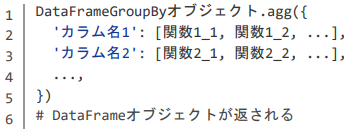

In [ ]:
import pandas as pd

df = pd.read_csv('sales.csv')

groups = df.groupby('product')

df_agg = groups.agg({
  'arrival': ['sum'],
  'sales': ['min', 'max']
})

print(df_agg)

        arrival sales      
            sum   min   max
product                    
carrot     1550   300   420
potato     4671   980  1102


### ⾃作関数の適⽤

値を集約する関数を⾃作して、⾃作した関数を適⽤することもできる。

In [ ]:
import pandas as pd

def my_sum_mult(x):
  # 引数xには列が代入される
  # 列を集約した値を返す
  return sum(x) * 2

df = pd.read_csv('sales.csv')

groups = df.groupby('product')

df_agg = groups.agg(my_sum_mult)
print(df_agg)


          year  arrival  sales
product                       
carrot   16012     3100   2700
potato   16012     9342   8248


### transform

transform メソッドを利⽤することで、グループのカラムごとに関数を適⽤して

要素の値の変換することができる。

下記に利⽤⽅法を⽰す。

image.png

例えば、⽋損値をグループのデータの平均値で置き換える場合などに利⽤する。

例を確認するために⽋損値を含むデータ sales_w_na.csv を確認する。

In [ ]:
import pandas as pd

df = pd.read_csv('sales_w_na.csv')

print(df)

   year product  arrival   sales
0  2000  carrot    400.0     NaN
1  2000  potato   1200.0     NaN
2  2001  carrot      NaN   310.0
3  2001  potato      NaN   980.0
4  2002  carrot    350.0   320.0
5  2002  potato   1190.0  1021.0
6  2003  carrot    450.0   420.0
7  2003  potato   1200.0  1102.0


2000年の売り上げ個数と、2001年の⼊庫数が⽋損している。

このデータに対して、⽋損値をグループのカラムごとに平均値を求めて置き換える。

この処理を例に transform メソッドの適⽤イメージを⽰す。

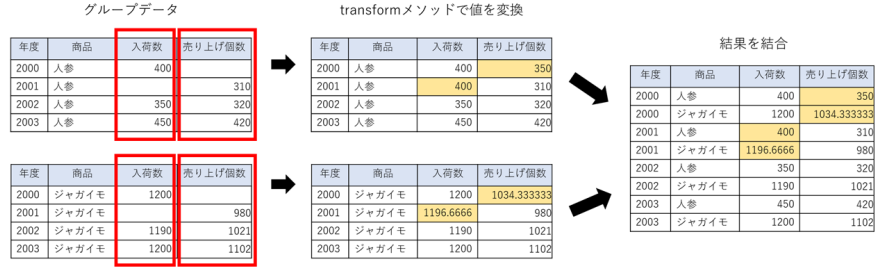

In [ ]:
import pandas as pd

def fill_na_mean(x):
  # xには年度ごとの列が代入されている
  avg = x.mean()
  # 列を変換した値を列で返す
  return x.fillna(avg)

df = pd.read_csv('sales_w_na.csv')

groups = df.groupby('product')

df_fill_na_mean = groups.transform(fill_na_mean)

print('--read data--')
print(df)
print('--fill na mean--')
print(df_fill_na_mean)

--read data--
   year product  arrival   sales
0  2000  carrot    400.0     NaN
1  2000  potato   1200.0     NaN
2  2001  carrot      NaN   310.0
3  2001  potato      NaN   980.0
4  2002  carrot    350.0   320.0
5  2002  potato   1190.0  1021.0
6  2003  carrot    450.0   420.0
7  2003  potato   1200.0  1102.0
--fill na mean--
   year      arrival        sales
0  2000   400.000000   350.000000
1  2000  1200.000000  1034.333333
2  2001   400.000000   310.000000
3  2001  1196.666667   980.000000
4  2002   350.000000   320.000000
5  2002  1190.000000  1021.000000
6  2003   450.000000   420.000000
7  2003  1200.000000  1102.000000


### filter

filter メソッドを利⽤することで、条件に合致したグループを抽出できる。

下記に利⽤⽅法を⽰す。

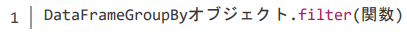

グループの売り上げ個数の合計が2,000個以上あるグループを抽出する例を⽰す。

In [ ]:
import pandas as pd

df = pd.read_csv('sales.csv')

groups = df.groupby('product')

# 関数の引数xにはグループごとのデータフレームがはいる
df_filter = groups.filter(lambda x: x['sales'].sum() >= 2000)

print(groups.sum()['sales'])
print('\n--filter--')
print(df_filter)


product
carrot    1350
potato    4124
Name: sales, dtype: int64

--filter--
   year product  arrival  sales
1  2000  potato     1200   1021
3  2001  potato     1081    980
5  2002  potato     1190   1021
7  2003  potato     1200   1102


## 練習問題

### 1-1.

sales.csv を読み込んで year カラムでグルーピングした後、

DataFrameGroupByオブジェクト のイテレータを⽤いて各グループの名前と値を表⽰せよ。


In [ ]:
import pandas as pd

df = pd.read_csv('sales.csv')

# 以下にコードを記述




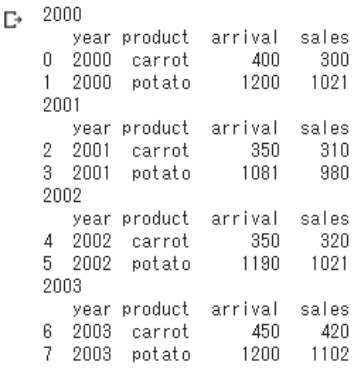

### 1-2.

sales.csv を読み込んで year カラムでグルーピングした後、

以下の条件で各カラムの値を集約して表⽰せよ。

[条件]
- arrival カラム: sum、mean、max、min
- sales カラム: sum、mean、max、min


In [ ]:
import pandas as pd

df = pd.read_csv('sales.csv')

# 以下にコードを記述




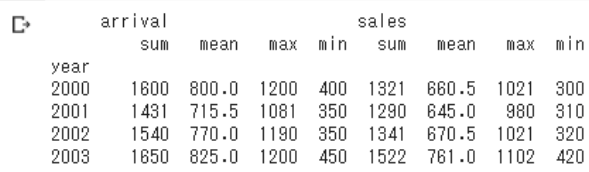

### 1-3.

sales.csv を読み込んで product カラムでグルーピングした後、

各カラムの値を以下の式を適⽤した値に変換して表⽰せよ。

[式]

各カラムの値 / (商品)グループのカラムの平均値

In [ ]:
import pandas as pd

df = pd.read_csv('sales.csv')

# 以下にコードを記述




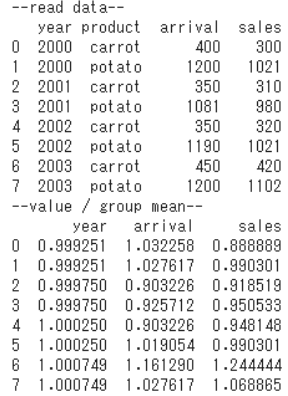

### 1-4.

sales.csv を読み込んで year カラムでグルーピングした後、

sales カラムの合計が1500以上のグループを抽出して表⽰せよ。

In [ ]:
import pandas as pd

df = pd.read_csv('sales.csv')

# 以下にコードを記述




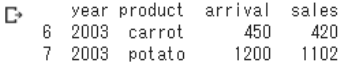

# 2. 時系列データ

本章ではPandasにおける時系列データの扱いについて紹介する。

## 2-1. 時系列データを扱う準備

### csvファイルの読み込み

pandasで時系列データを扱う準備として、

temp.csv ファイルの読み込みを⾏う（出典︓気象庁ホームページ）。

temp.csv には2015年の1年間の気温情報を1時間間隔で持つ。

データを読み込みデータの最初の5件と最後の5件を確認する。

In [ ]:
import pandas as pd

df = pd.read_csv('temp.csv')

print(df.head())
print(df.tail())

            date  temp
0  2015/1/1 1:00   5.7
1  2015/1/1 2:00   6.1
2  2015/1/1 3:00   5.1
3  2015/1/1 4:00   4.5
4  2015/1/1 5:00   4.2
                  date  temp
8755  2015/12/31 20:00   7.4
8756  2015/12/31 21:00   7.3
8757  2015/12/31 22:00   6.5
8758  2015/12/31 23:00   5.8
8759     2016/1/1 0:00   5.2


データを確認すると、 date カラムに⽇時、 temp に気温が格納されていることが分かる。

### Indexに⽇時データを設定

pandasで時系列データを扱う場合、DataFrameのIndexに datetime 型のデータを格納する。

読み込まれたデータの型を確認すると date カラム
は object 型、 temp カラムは float64 型で読み込まれている。


Pandasで扱えるデータ型と datetime 型についてはコラムの Pandasで定義されている型 と 日時を扱うクラス に紹介する。

In [ ]:
import pandas as pd

df = pd.read_csv('temp.csv')

print(df.dtypes)

date     object
temp    float64
dtype: object


ここでは date カラムを⽇時データとして扱うため datetime 型に変換してIndexに格納する。

object 型を datetime 型に変換するには pandas.to_datetime 関数を利⽤する。

In [ ]:
import pandas as pd

df = pd.read_csv('temp.csv')

# indexにdateカラムをdatetime型に変更して格納する
df.index = pd.to_datetime(df['date'])
# dateを削除する
df = df.drop('date', axis=1)

print("columns type = {}".format(df.dtypes))
# indexのタイプを確認する
print("index type = {}".format(df.index.dtype))
print(df.head())

columns type = temp    float64
dtype: object
index type = datetime64[ns]
                     temp
date                     
2015-01-01 01:00:00   5.7
2015-01-01 02:00:00   6.1
2015-01-01 03:00:00   5.1
2015-01-01 04:00:00   4.5
2015-01-01 05:00:00   4.2


また上記の、csv読み込み時に date カラムを datetime 型に変換してIndexに設定する操作は、

 pandas.read_csv 関数の引数に index_col='date と parse_dates=True を指定しても同様の操作となる。

In [ ]:
import pandas as pd

# indexにカラムdateをdatetimeとして読み込む
df = pd.read_csv('temp.csv', index_col='date', parse_dates=True)

print("columns type = {}".format(df.dtypes))
print("index type = {}".format(df.index.dtype))
print(df.head())

columns type = temp    float64
dtype: object
index type = datetime64[ns]
                     temp
date                     
2015-01-01 01:00:00   5.7
2015-01-01 02:00:00   6.1
2015-01-01 03:00:00   5.1
2015-01-01 04:00:00   4.5
2015-01-01 05:00:00   4.2


## 2-2. 時系列データを扱う

先ほどの操作で、時系列データを扱う際のDataFrameの準備が完了した。

ここでは、準備したDataFrameを⽤いて、特定の⽇付の⾏の抽出、期間による⾏の分割と集約、隣合う期間のデータを集約、時間⽅向のデータのシフトの4つの操作⽅法を⽰す。

### 特定の⽇付の⾏の抽出

DataFrameオブジェクト['日付を示す文字列'] と指定することで指定した⽇付のデータを取得できる。

In [ ]:
import pandas as pd

df = pd.read_csv('temp.csv', index_col='date', parse_dates=True)

# 2015/01/01
print('--2015/01/01--')
print(df['2015-01-01'].head())
print(df['2015-01-01'].tail())

# 2015/01
print('\n--2015/01--')
print(df['2015-01'])

# 2015
print('\n--2015--')
print(df['2015'])

--2015/01/01--
                     temp
date                     
2015-01-01 01:00:00   5.7
2015-01-01 02:00:00   6.1
2015-01-01 03:00:00   5.1
2015-01-01 04:00:00   4.5
2015-01-01 05:00:00   4.2
                     temp
date                     
2015-01-01 19:00:00   2.6
2015-01-01 20:00:00   2.0
2015-01-01 21:00:00   1.6
2015-01-01 22:00:00   1.5
2015-01-01 23:00:00   1.3

--2015/01--
                     temp
date                     
2015-01-01 01:00:00   5.7
2015-01-01 02:00:00   6.1
2015-01-01 03:00:00   5.1
2015-01-01 04:00:00   4.5
2015-01-01 05:00:00   4.2
...                   ...
2015-01-31 19:00:00   4.1
2015-01-31 20:00:00   3.6
2015-01-31 21:00:00   2.6
2015-01-31 22:00:00   2.8
2015-01-31 23:00:00   2.1

[743 rows x 1 columns]

--2015--
                     temp
date                     
2015-01-01 01:00:00   5.7
2015-01-01 02:00:00   6.1
2015-01-01 03:00:00   5.1
2015-01-01 04:00:00   4.5
2015-01-01 05:00:00   4.2
...                   ...
2015-12-31 19:00:00   8.1
20

<ipython-input-18-e0f1524bf600>:7: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(df['2015-01-01'].head())
<ipython-input-18-e0f1524bf600>:8: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(df['2015-01-01'].tail())
<ipython-input-18-e0f1524bf600>:12: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(df['2015-01'])
<ipython-input-18-e0f1524bf600>:16: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is de

DataFrameオブジェクト['日付を表す文字列1:日付を表す文字列2'] と指定することで

日付を表す文字列1 から 日付を表す文字列2 の期間のデータを取得できる。

In [ ]:
import pandas as pd

df = pd.read_csv('temp.csv', index_col='date', parse_dates=True)

# 2015/01/01～2015-01-02
print('\n--2015-01-01:2015-01-02--')
print(df['2015-01-01':'2015-01-02'].head())
print(df['2015-01-01':'2015-01-02'].tail())


--2015-01-01:2015-01-02--
                     temp
date                     
2015-01-01 01:00:00   5.7
2015-01-01 02:00:00   6.1
2015-01-01 03:00:00   5.1
2015-01-01 04:00:00   4.5
2015-01-01 05:00:00   4.2
                     temp
date                     
2015-01-02 19:00:00   2.5
2015-01-02 20:00:00   3.6
2015-01-02 21:00:00   3.5
2015-01-02 22:00:00   3.0
2015-01-02 23:00:00   1.8


### 期間による⾏の分割と集約

DataFrameオブジェクト.resample メソッドを利⽤することで、特定の期間に⾏を分割して集約関数を適⽤できる。

前章で扱ったグルーピングを期間ごとにしているイメージを持つと分かりやすい。

image.png

期間は 周期を表す文字 で設定する。

代表的な 周期を表す文字 を⽰す。

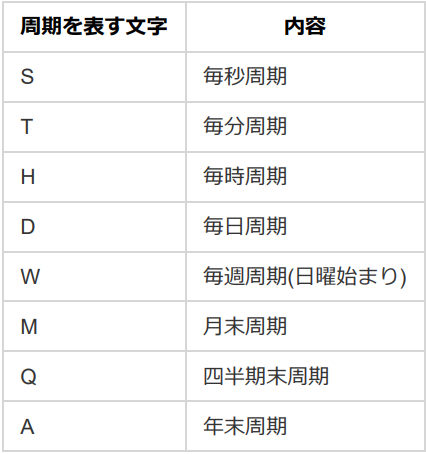

利⽤可能な集約関数の代表例を⽰す。

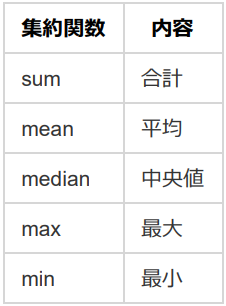

下記に具体的な利⽤例を⽰す。

In [ ]:
import pandas as pd

df = pd.read_csv('temp.csv', index_col='date', parse_dates=True)

# 月ごとの最高、最低気温
print(df.resample('M').max())
print(df.resample('M').min())

            temp
date            
2015-01-31  15.4
2015-02-28  18.3
2015-03-31  23.1
2015-04-30  26.2
2015-05-31  31.9
2015-06-30  30.1
2015-07-31  35.1
2015-08-31  36.4
2015-09-30  30.9
2015-10-31  27.3
2015-11-30  23.2
2015-12-31  23.8
2016-01-31   5.2
            temp
date            
2015-01-31  -1.8
2015-02-28  -1.7
2015-03-31  -0.3
2015-04-30   2.8
2015-05-31  12.1
2015-06-30  13.5
2015-07-31  17.8
2015-08-31  18.0
2015-09-30  16.2
2015-10-31  10.4
2015-11-30   4.5
2015-12-31   2.6
2016-01-31   5.2


前章のグルーピングで説明した agg 関数を利⽤しても同様の操作ができる。

In [ ]:
import pandas as pd

df = pd.read_csv('temp.csv', index_col='date', parse_dates=True)

# 月ごとの最高、最低気温
df_agg = df.resample('M').agg(['max', 'min'])
print(df_agg)

            temp      
             max   min
date                  
2015-01-31  15.4  -1.8
2015-02-28  18.3  -1.7
2015-03-31  23.1  -0.3
2015-04-30  26.2   2.8
2015-05-31  31.9  12.1
2015-06-30  30.1  13.5
2015-07-31  35.1  17.8
2015-08-31  36.4  18.0
2015-09-30  30.9  16.2
2015-10-31  27.3  10.4
2015-11-30  23.2   4.5
2015-12-31  23.8   2.6
2016-01-31   5.2   5.2


### 隣合う期間のデータを集約

DataFrameオブジェクト.rolling メソッドを利⽤することで、ウィンドウ幅(計算に含める⾏数)ごとに集約関数を適⽤できる。

移動平均を求める時などに利⽤する。

resample メソッドと同様にグルーピングを期間ごとにしているイメージを持つと分かりやすい。

resample メソッドは期間を被りなくグルーピングするのに対して、 rolling メソッドは期間に被りがある点が異なる。

下記に利⽤⽅法を⽰す。

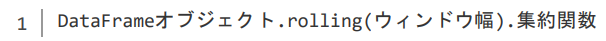

rolling メソッドの動作を下記図を⽤いて説明する。

rolling メソッドはウィンドウ幅に指定した範囲をグルーピングして、

グルーピングした⾏に集約関数を適⽤させる。

この操作を1⾏ずらしながら繰り返し実⾏する。

例えば、ウィンドウ幅に3を指定した場合は3⾏ごとのグループとなり、3⾏ごとに集約関数が適⽤される。

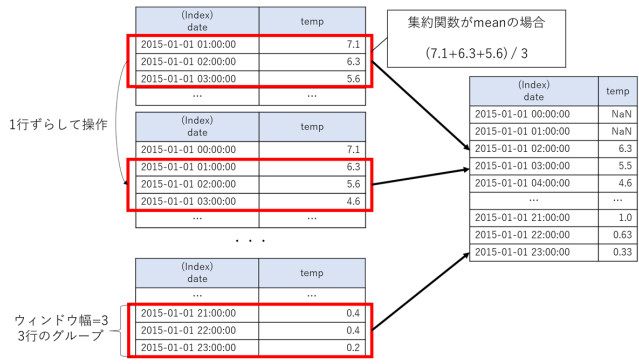

2015-1-1 に絞りウィンドウ幅を3(3時間ごと)を指定した場合の移動平均を求める例を⽰す。

移動平均はウィンドウ幅ごとに平均値を取った値である。

In [ ]:
import pandas as pd

df = pd.read_csv('temp.csv', index_col='date', parse_dates=True)

# 2015/1/1のデータに絞り込む
df = df['2015-1-1']
print(df['temp'])
# 3時間ごとの移動平均を求める
df = df.rolling(3).mean()
print(df['temp'])


date
2015-01-01 01:00:00    5.7
2015-01-01 02:00:00    6.1
2015-01-01 03:00:00    5.1
2015-01-01 04:00:00    4.5
2015-01-01 05:00:00    4.2
2015-01-01 06:00:00    3.5
2015-01-01 07:00:00    3.1
2015-01-01 08:00:00    3.0
2015-01-01 09:00:00    5.1
2015-01-01 10:00:00    5.1
2015-01-01 11:00:00    5.1
2015-01-01 12:00:00    5.3
2015-01-01 13:00:00    4.5
2015-01-01 14:00:00    3.9
2015-01-01 15:00:00    4.4
2015-01-01 16:00:00    4.1
2015-01-01 17:00:00    3.4
2015-01-01 18:00:00    3.0
2015-01-01 19:00:00    2.6
2015-01-01 20:00:00    2.0
2015-01-01 21:00:00    1.6
2015-01-01 22:00:00    1.5
2015-01-01 23:00:00    1.3
Name: temp, dtype: float64
date
2015-01-01 01:00:00         NaN
2015-01-01 02:00:00         NaN
2015-01-01 03:00:00    5.633333
2015-01-01 04:00:00    5.233333
2015-01-01 05:00:00    4.600000
2015-01-01 06:00:00    4.066667
2015-01-01 07:00:00    3.600000
2015-01-01 08:00:00    3.200000
2015-01-01 09:00:00    3.733333
2015-01-01 10:00:00    4.400000
2015-01-01 11:00:00   

<ipython-input-22-2595c471b6d5>:6: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df = df['2015-1-1']


移動平均はグラフの全体の傾向を把握するためグラフを平滑化する場合などに利⽤される。

ウィンドウ幅を変更した場合の移動平均のグラフを⽰す。

グラフを⾒るとウィンドウ幅が広い⽅がグラフが平滑化されていることが分かる。

<ipython-input-23-9d398a91da04>:7: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df = df['2015-1-1']


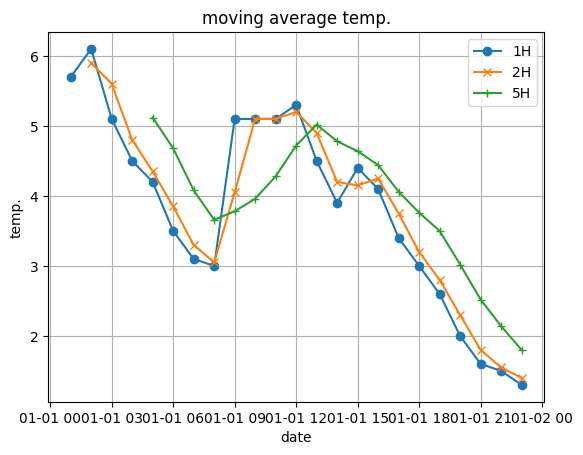

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('temp.csv', index_col='date', parse_dates=True)

# 2015/1/1のデータに絞り込む
df = df['2015-1-1']
# 2時間ごとの移動平均を求める
df1 = df.rolling(2).mean()
# 5時間ごとの移動平均を求める
df2 = df.rolling(5).mean()

plt.plot(df.index, df['temp'], 'o-', label='1H')
plt.plot(df1.index, df1['temp'], 'x-', label='2H')
plt.plot(df2.index, df2['temp'], '+-', label='5H')

plt.xlabel('date')
plt.ylabel('temp.')

plt.title('moving average temp.')
plt.legend()
plt.grid()
plt.show()

rolling メソッドの引数に 周期を表す文字 を指定することもできる。

周期を表す文字 を指定した場合は、Indexの⽇時に基づいてデータがグループピングされる。


2015-1-1 のデータについて 周期を表す文字 に 3H (3時間ごと)を指定した場合、

以下の表のようにグルーピングされる。

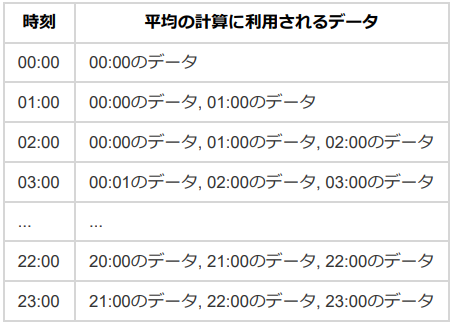

In [ ]:
import pandas as pd

df = pd.read_csv('temp.csv', index_col='date', parse_dates=True)

# 2015/1/1のデータに絞り込む
df = df['2015-1-1']
print(df['temp'])
# 3時間ごとの移動平均を求める
df = df.rolling('3H').mean()
print(df['temp'])

date
2015-01-01 01:00:00    5.7
2015-01-01 02:00:00    6.1
2015-01-01 03:00:00    5.1
2015-01-01 04:00:00    4.5
2015-01-01 05:00:00    4.2
2015-01-01 06:00:00    3.5
2015-01-01 07:00:00    3.1
2015-01-01 08:00:00    3.0
2015-01-01 09:00:00    5.1
2015-01-01 10:00:00    5.1
2015-01-01 11:00:00    5.1
2015-01-01 12:00:00    5.3
2015-01-01 13:00:00    4.5
2015-01-01 14:00:00    3.9
2015-01-01 15:00:00    4.4
2015-01-01 16:00:00    4.1
2015-01-01 17:00:00    3.4
2015-01-01 18:00:00    3.0
2015-01-01 19:00:00    2.6
2015-01-01 20:00:00    2.0
2015-01-01 21:00:00    1.6
2015-01-01 22:00:00    1.5
2015-01-01 23:00:00    1.3
Name: temp, dtype: float64
date
2015-01-01 01:00:00    5.700000
2015-01-01 02:00:00    5.900000
2015-01-01 03:00:00    5.633333
2015-01-01 04:00:00    5.233333
2015-01-01 05:00:00    4.600000
2015-01-01 06:00:00    4.066667
2015-01-01 07:00:00    3.600000
2015-01-01 08:00:00    3.200000
2015-01-01 09:00:00    3.733333
2015-01-01 10:00:00    4.400000
2015-01-01 11:00:00   

<ipython-input-24-df64f84c58cc>:6: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df = df['2015-1-1']


rolling メソッドの引数に定周期ではない 周期を表す文字 を指定するとエラーとなる。

In [ ]:
import pandas as pd

df = pd.read_csv('temp.csv', index_col='date', parse_dates=True)

# 毎月の平均
df = df.resample('M').mean()
# 'M'は月ごとに日付が異なるため定周期ではない
df = df.rolling('3M').mean()
print(df['temp'])

ValueError: ignored

### 時間⽅向のデータのシフト

DataFrameオブジェクト.shift メソッドを利⽤することで、データを時間(⾏)⽅向に移動できる。

時間での変化率や変化量を求める場合などに利⽤する。

下記に利⽤⽅法を⽰す。

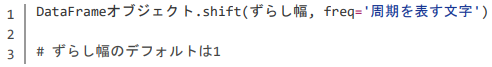

DataFrameオブジェクト.shift メソッドの利⽤⽅法を1か⽉ごとの気温の変化量を求める例で⽰す。

変化量は次の2つの操作で得られる。

1. shift メソッドを利⽤してテーブルの temp カラムの値を1か⽉後⽅に移動する

2. シフト前の値からシフト後の値を減算する

それぞれの操作を図で説明する。

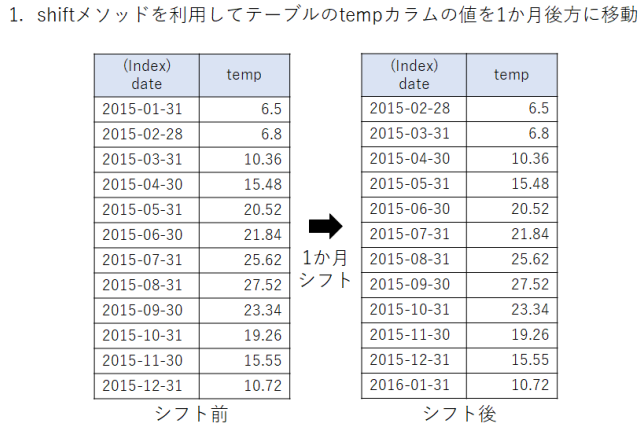

DataFrameオブジェクト.shift メソッドを利⽤して、データを1か⽉後⽅にずらす。

シフト前の 2015-01-31 の temp カラムの値が

シフト後の 2015-02-28 の temp カラムの値、

シフト前の 2015-02-28 の temp カラムの値が

シフト後の 2015-03-31 の temp カラムの値と

1か⽉後⽅に移動している。

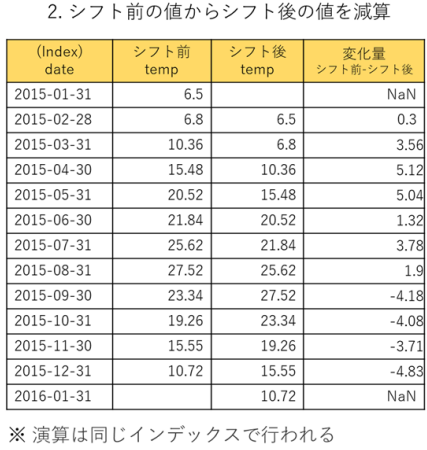

Pandasの演算は同じインデックス同⼠で⾏われるため、

シフト前の値からシフト後の値を減算すると変化量を得ることができる。

下記に変化量を求める例を⽰す。

In [ ]:
import pandas as pd

df = pd.read_csv('temp.csv', index_col='date', parse_dates=True)

# 毎月の平均
df1 = df.resample('M').mean()
df2 = df1.shift(1, freq='M')
print("before shift")
print(df1)
print("\nafter shift")
print(df2)

# 変化量
print("\namount of change")
print(df1['temp'] - df2['temp'])

before shift
                 temp
date                 
2015-01-31   5.777389
2015-02-28   5.702381
2015-03-31  10.240054
2015-04-30  14.520556
2015-05-31  21.086425
2015-06-30  22.092083
2015-07-31  26.226882
2015-08-31  26.686290
2015-09-30  22.587500
2015-10-31  18.419086
2015-11-30  13.924861
2015-12-31   9.353898
2016-01-31   5.200000

after shift
                 temp
date                 
2015-02-28   5.777389
2015-03-31   5.702381
2015-04-30  10.240054
2015-05-31  14.520556
2015-06-30  21.086425
2015-07-31  22.092083
2015-08-31  26.226882
2015-09-30  26.686290
2015-10-31  22.587500
2015-11-30  18.419086
2015-12-31  13.924861
2016-01-31   9.353898
2016-02-29   5.200000

amount of change
date
2015-01-31         NaN
2015-02-28   -0.075008
2015-03-31    4.537673
2015-04-30    4.280502
2015-05-31    6.565869
2015-06-30    1.005659
2015-07-31    4.134798
2015-08-31    0.459409
2015-09-30   -4.098790
2015-10-31   -4.168414
2015-11-30   -4.494225
2015-12-31   -4.570963
2016-01-31   -4

## 練習問題

### 2-1.

temp.csv を読み込んで、週ごとの平均気温、最⾼気温、最低気温を求めグラフに描画せよ。

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('temp.csv', index_col='date', parse_dates=True)

# 以下にコードを記述
# ------------------------------------------------------
# ------------------------------------------------------

plt.xlabel('date')
plt.ylabel('temp.')
plt.title('2015 temp.')
plt.legend()
plt.grid()
plt.show()

出力結果

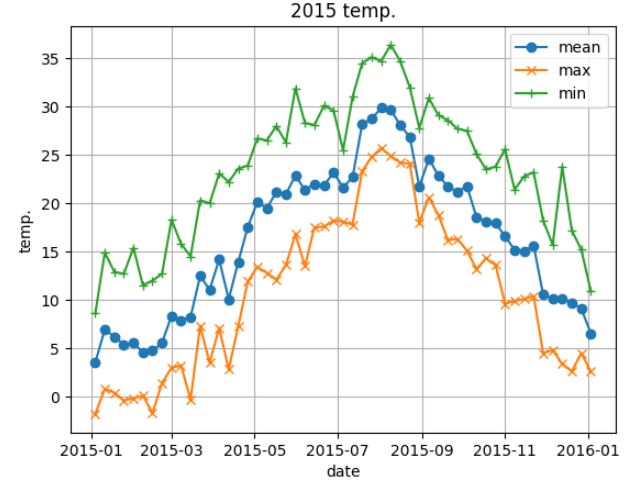

### 2-2.
temp.csv を読み込んで、1⽇ごと、5⽇ごと、30⽇ごとの移動平均を求めて描画せよ。

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('temp.csv', index_col='date', parse_dates=True)

# 以下にコードを記述
# ------------------------------------------------------
# ------------------------------------------------------

plt.xlabel('date')
plt.ylabel('temp.')
plt.title('2015 temp.')
plt.legend()
plt.grid()
plt.show()

出力結果

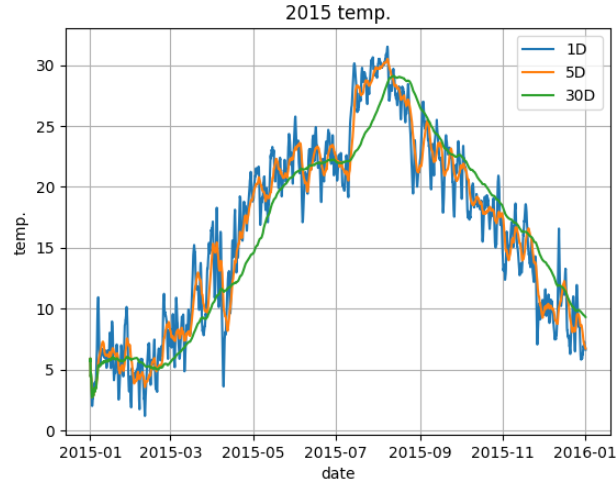